In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/AnimalBreedClassification/DLDataset/'
animal_categories = ['cat_v1', 'dog_v1', 'cattle']


In [ ]:
def get_dataset_info(dataset_path, animal_categories):
    dataset_info = {}
    for category in animal_categories:
        category_path = os.path.join(dataset_path, category)
        if not os.path.isdir(category_path):
            print(f"Warning: {category_path} does not exist.")
            continue
        breeds = os.listdir(category_path)
        breed_info = {}
        for breed in breeds:
            breed_path = os.path.join(category_path, breed)
            if os.path.isdir(breed_path):
                num_images = len([img for img in os.listdir(breed_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
                breed_info[breed] = num_images
        dataset_info[category] = breed_info
    return dataset_info

dataset_info = get_dataset_info(dataset_path, animal_categories)


<ipython-input-11-f6f79eb6f30f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette='viridis')


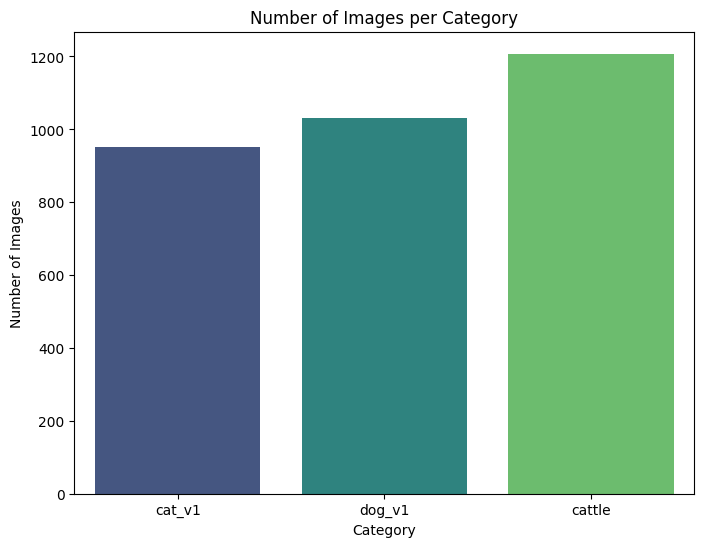

In [ ]:
category_counts = {category: sum(breeds.values()) for category, breeds in dataset_info.items()}

plt.figure(figsize=(8,6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette='viridis')
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()


<ipython-input-12-4be4ae832ba6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(breeds.keys()), y=list(breeds.values()), palette='magma')


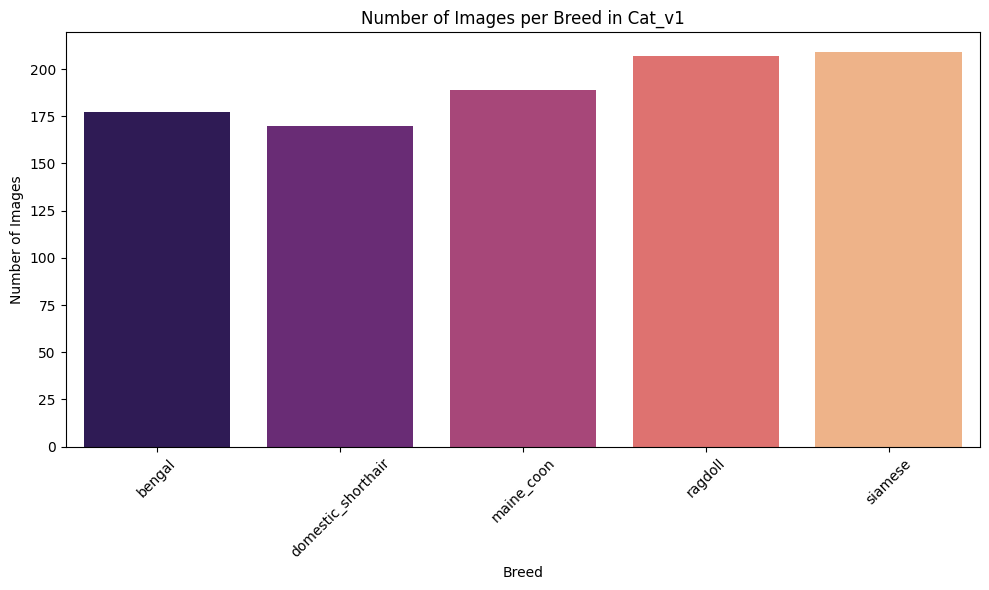

<ipython-input-12-4be4ae832ba6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(breeds.keys()), y=list(breeds.values()), palette='magma')


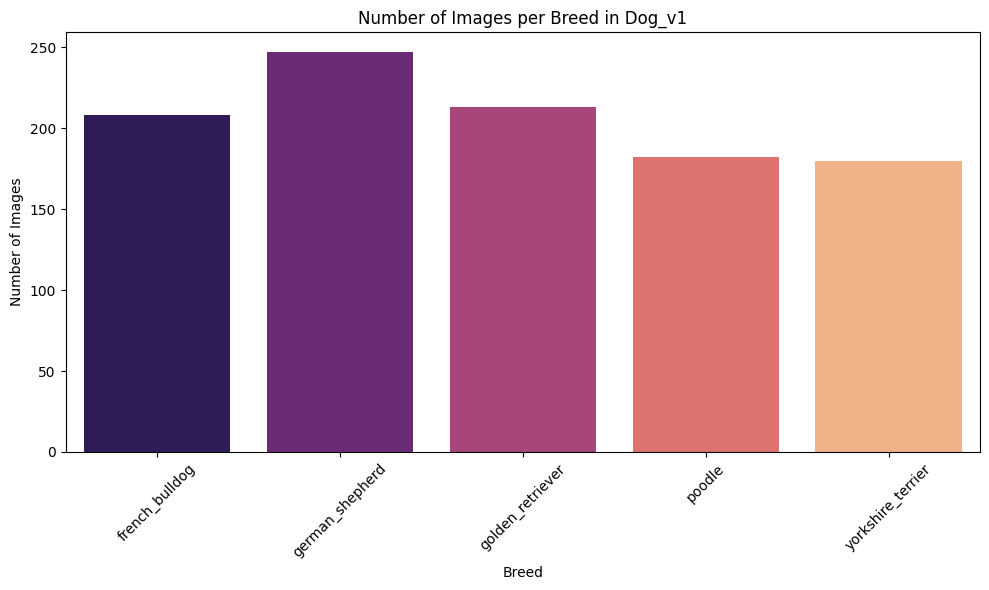

<ipython-input-12-4be4ae832ba6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(breeds.keys()), y=list(breeds.values()), palette='magma')


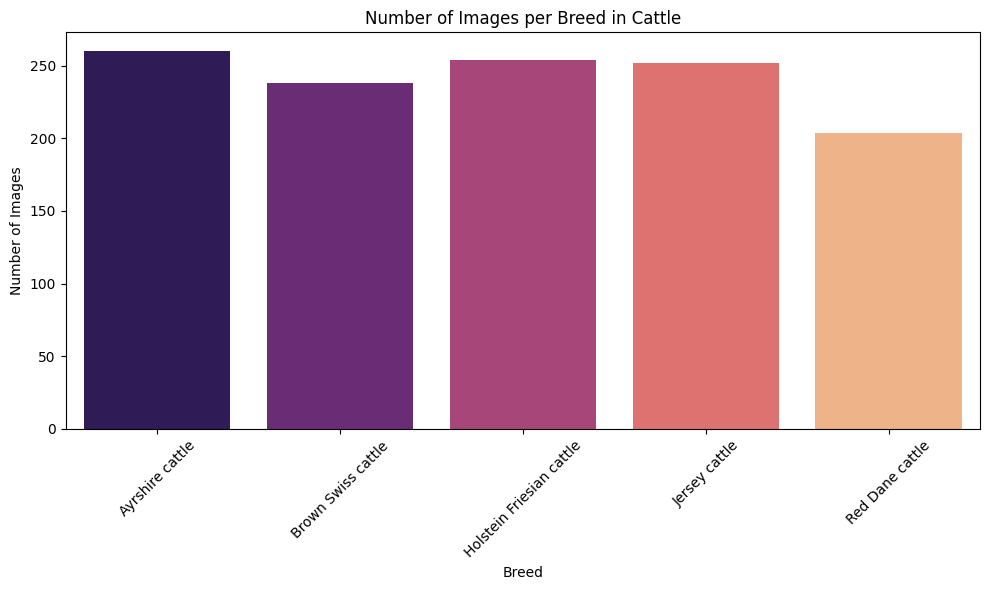

In [ ]:
for category, breeds in dataset_info.items():
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(breeds.keys()), y=list(breeds.values()), palette='magma')
    plt.title(f'Number of Images per Breed in {category.capitalize()}')
    plt.xlabel('Breed')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
def show_sample_images(dataset_path, animal_categories, samples_per_breed=3):
    for category in animal_categories:
        category_path = os.path.join(dataset_path, category)
        if not os.path.isdir(category_path):
            continue
        breeds = os.listdir(category_path)
        for breed in breeds:
            breed_path = os.path.join(category_path, breed)
            if not os.path.isdir(breed_path):
                continue
            images = [img for img in os.listdir(breed_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            if len(images) == 0:
                continue
            sample_images = random.sample(images, min(samples_per_breed, len(images)))
            plt.figure(figsize=(12,4))
            plt.suptitle(f'{category.capitalize()} - {breed}', fontsize=16)
            for i, img_name in enumerate(sample_images):
                img_path = os.path.join(breed_path, img_name)
                try:
                    img = Image.open(img_path)
                    plt.subplot(1, samples_per_breed, i+1)
                    plt.imshow(img)
                    plt.axis('off')
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

show_sample_images(dataset_path, animal_categories, samples_per_breed=3)


Output hidden; open in https://colab.research.google.com to view.

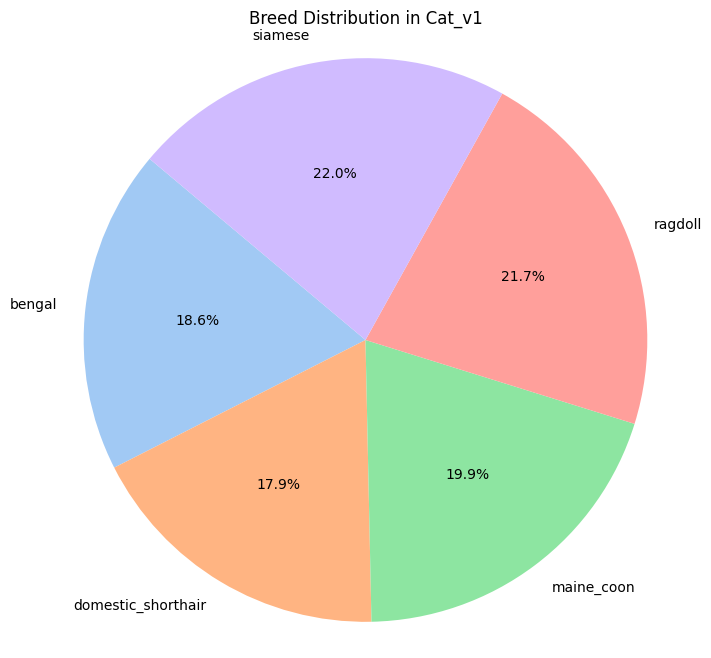

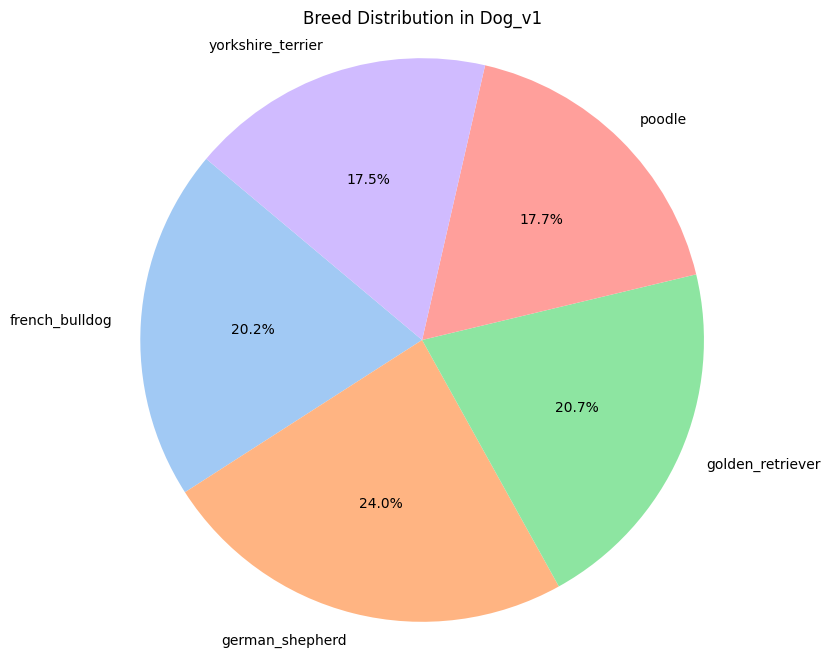

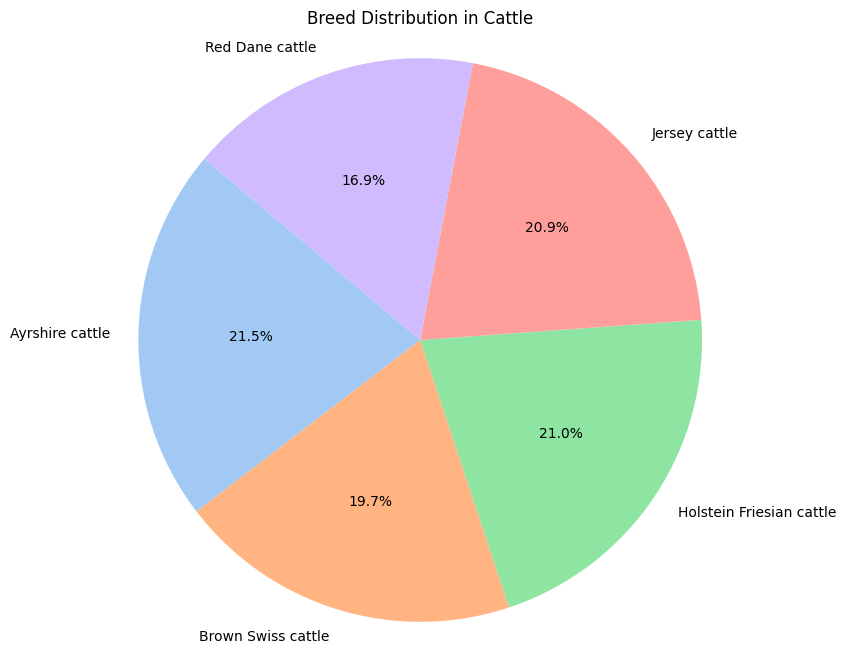

In [ ]:
for category, breeds in dataset_info.items():
    labels = list(breeds.keys())
    sizes = list(breeds.values())
    plt.figure(figsize=(8,8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'Breed Distribution in {category.capitalize()}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


In [ ]:
import plotly.express as px

# Number of Images per Category
fig = px.bar(x=list(category_counts.keys()), y=list(category_counts.values()),
             labels={'x':'Category', 'y':'Number of Images'},
             title='Number of Images per Category',
             color=list(category_counts.keys()),
             color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img
import random

# 1. Define Dataset Paths
# Set paths
original_dataset_path = '/content/drive/My Drive/AnimalBreedClassification/DLDataset/'  # Replace with your dataset path
augmented_dataset_path = '/content/drive/My Drive/AnimalBreedClassification/aumentated/'
animal_categories = ['cat_v1', 'dog_v1', 'cattle']            # Your dataset categories

# 2. Create Augmented Directory Structure
def create_augmented_directory_structure(original_dataset_path, augmented_dataset_path, animal_categories):
    for category in animal_categories:
        category_path = os.path.join(original_dataset_path, category)
        if os.path.exists(category_path):
            for breed in os.listdir(category_path):
                breed_path = os.path.join(category_path, breed)
                if os.path.isdir(breed_path):
                    new_breed_path = os.path.join(augmented_dataset_path, category, breed)
                    os.makedirs(new_breed_path, exist_ok=True)

create_augmented_directory_structure(original_dataset_path, augmented_dataset_path, animal_categories)

# 3. Define Augmentation Parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 4. Function to Augment and Save Images
def augment_images(original_dataset_path, augmented_dataset_path, animal_categories, target_num=100):
    for category in animal_categories:
        category_path = os.path.join(original_dataset_path, category)
        if not os.path.isdir(category_path):
            continue
        for breed in os.listdir(category_path):
            breed_path = os.path.join(category_path, breed)
            if not os.path.isdir(breed_path):
                continue

            images = [img for img in os.listdir(breed_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            num_images = len(images)
            print(f"{category}/{breed} has {num_images} images. Augmenting...")

            if num_images >= target_num:
                continue  # Skip if already enough images

            new_breed_path = os.path.join(augmented_dataset_path, category, breed)
            total_generated = 0

            while total_generated + num_images < target_num:
                img_name = random.choice(images)
                img_path = os.path.join(breed_path, img_name)
                img = load_img(img_path)          # Load image
                x = img_to_array(img)             # Convert image to array
                x = x.reshape((1,) + x.shape)     # Reshape

                # Generate and save augmented images
                for batch in datagen.flow(x, batch_size=1):
                    aug_img_name = f"aug_{total_generated}_{img_name}"
                    aug_img_path = os.path.join(new_breed_path, aug_img_name)
                    save_img(aug_img_path, batch[0])  # Save augmented image
                    total_generated += 1
                    if total_generated + num_images >= target_num:
                        break
    print("Data augmentation completed.")

# 5. Perform Augmentation
augment_images(original_dataset_path, augmented_dataset_path, animal_categories, target_num=500)


cat_v1/bengal has 177 images. Augmenting...
cat_v1/domestic_shorthair has 170 images. Augmenting...
cat_v1/maine_coon has 189 images. Augmenting...
cat_v1/ragdoll has 207 images. Augmenting...
cat_v1/siamese has 209 images. Augmenting...
dog_v1/french_bulldog has 208 images. Augmenting...
dog_v1/german_shepherd has 247 images. Augmenting...
dog_v1/golden_retriever has 213 images. Augmenting...
dog_v1/poodle has 182 images. Augmenting...
dog_v1/yorkshire_terrier has 180 images. Augmenting...
cattle/Ayrshire cattle has 260 images. Augmenting...
cattle/Brown Swiss cattle has 238 images. Augmenting...
cattle/Holstein Friesian cattle has 254 images. Augmenting...
cattle/Jersey cattle has 252 images. Augmenting...
cattle/Red Dane cattle has 204 images. Augmenting...
Data augmentation completed.


In [ ]:
import os
import shutil

# Paths
original_dataset_path = '/content/drive/My Drive/AnimalBreedClassification/DLDataset/'  # Replace with your dataset path
augmented_dataset_path = '/content/drive/My Drive/AnimalBreedClassification/aumentated/'      # Replace with your augmented dataset path
combined_dataset_path = '/content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/'        # Replace with the path for combined dataset

# Categories (e.g., cat, dog, cattle)
animal_categories = ['cat_v1', 'dog_v1', 'cattle']  # Replace with your dataset categories

# Function to create directory structure for combined dataset
def create_combined_directory_structure(original_dataset_path, combined_dataset_path, animal_categories):
    for category in animal_categories:
        category_path = os.path.join(original_dataset_path, category)
        if os.path.exists(category_path):
            for breed in os.listdir(category_path):
                breed_path = os.path.join(category_path, breed)
                if os.path.isdir(breed_path):
                    new_breed_path = os.path.join(combined_dataset_path, category, breed)
                    os.makedirs(new_breed_path, exist_ok=True)

# Function to copy images from one dataset to another
def copy_images(source_dataset_path, combined_dataset_path, animal_categories):
    for category in animal_categories:
        category_path = os.path.join(source_dataset_path, category)
        if not os.path.isdir(category_path):
            continue
        for breed in os.listdir(category_path):
            breed_path = os.path.join(category_path, breed)
            if not os.path.isdir(breed_path):
                continue

            # Destination folder
            combined_breed_path = os.path.join(combined_dataset_path, category, breed)

            # Copy images from breed folder to combined dataset
            for img_file in os.listdir(breed_path):
                img_path = os.path.join(breed_path, img_file)
                if os.path.isfile(img_path):
                    shutil.copy(img_path, combined_breed_path)  # Copy the image to the new path
            print(f"Copied images from {category}/{breed}")

# Create directory structure for combined dataset
create_combined_directory_structure(original_dataset_path, combined_dataset_path, animal_categories)

# Copy original images to combined dataset
copy_images(original_dataset_path, combined_dataset_path, animal_categories)

# Copy augmented images to combined dataset
copy_images(augmented_dataset_path, combined_dataset_path, animal_categories)

print("Combination of original and augmented data completed.")


Copied images from cat_v1/bengal
Copied images from cat_v1/domestic_shorthair
Copied images from cat_v1/maine_coon
Copied images from cat_v1/ragdoll
Copied images from cat_v1/siamese
Copied images from dog_v1/french_bulldog
Copied images from dog_v1/german_shepherd
Copied images from dog_v1/golden_retriever
Copied images from dog_v1/poodle
Copied images from dog_v1/yorkshire_terrier
Copied images from cattle/Ayrshire cattle
Copied images from cattle/Brown Swiss cattle
Copied images from cattle/Holstein Friesian cattle
Copied images from cattle/Jersey cattle
Copied images from cattle/Red Dane cattle
Copied images from cat_v1/bengal
Copied images from cat_v1/domestic_shorthair
Copied images from cat_v1/maine_coon
Copied images from cat_v1/ragdoll
Copied images from cat_v1/siamese
Copied images from dog_v1/french_bulldog
Copied images from dog_v1/german_shepherd
Copied images from dog_v1/golden_retriever
Copied images from dog_v1/poodle
Copied images from dog_v1/yorkshire_terrier
Copied i

In [ ]:
combined_dataset = '/content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/'

def get_dataset_info(combined_dataset, animal_categories):
    dataset_info = {}
    for category in animal_categories:
        category_path = os.path.join(combined_dataset, category)
        if not os.path.isdir(category_path):
            print(f"Warning: {category_path} does not exist.")
            continue
        breeds = os.listdir(category_path)
        breed_info = {}
        for breed in breeds:
            breed_path = os.path.join(category_path, breed)
            if os.path.isdir(breed_path):
                num_images = len([img for img in os.listdir(breed_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
                breed_info[breed] = num_images
        dataset_info[category] = breed_info
    return dataset_info

dataset_info = get_dataset_info(combined_dataset, animal_categories)


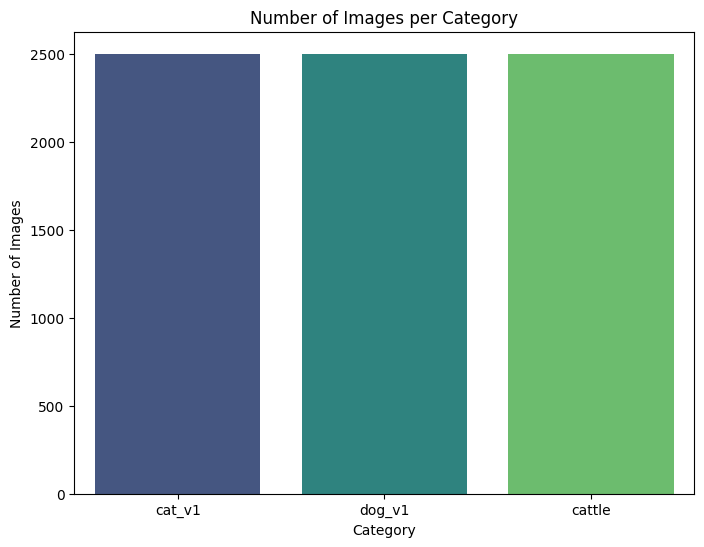

In [ ]:
category_counts = {category: sum(breeds.values()) for category, breeds in dataset_info.items()}

plt.figure(figsize=(8,6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette='viridis')
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()


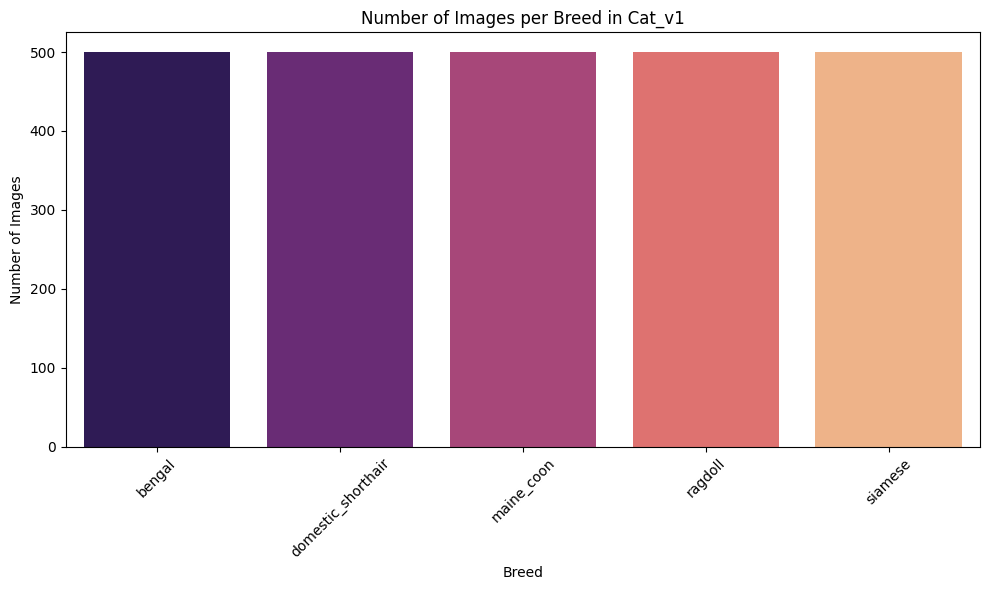

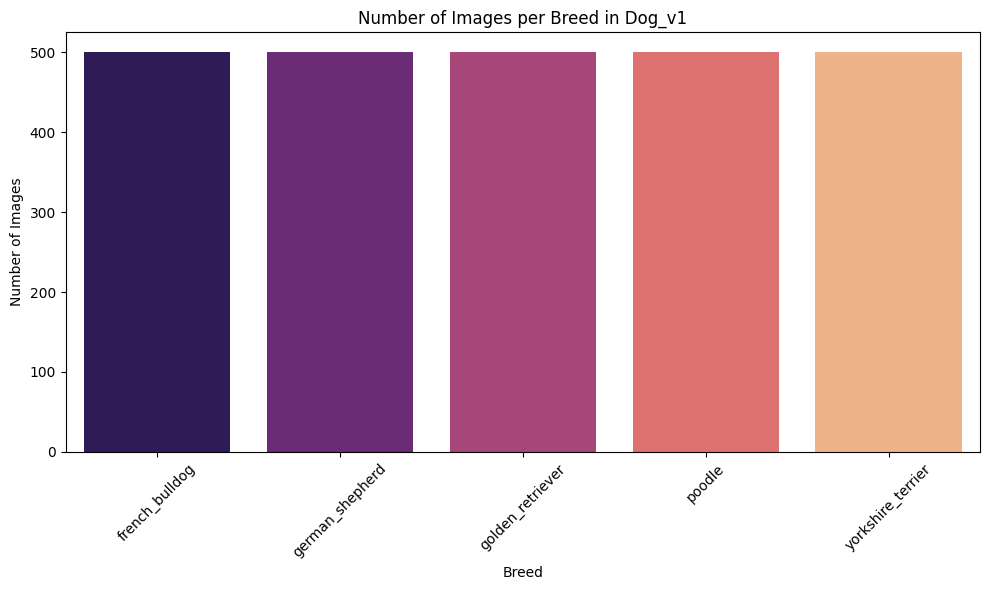

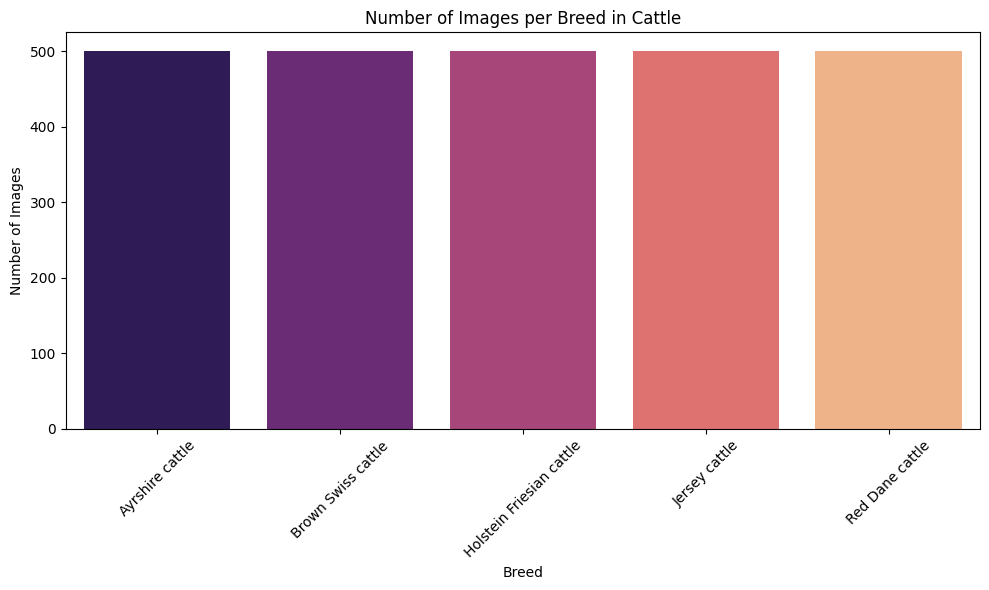

In [ ]:
for category, breeds in dataset_info.items():
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(breeds.keys()), y=list(breeds.values()), palette='magma')
    plt.title(f'Number of Images per Breed in {category.capitalize()}')
    plt.xlabel('Breed')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
import os
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
combined_dataset = '/content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/'
animal_categories = ['cat_v1', 'dog_v1', 'cattle']

In [ ]:
def inspect_dataset(combined_dataset, animal_categories):
    # Initialize a list to store image data
    image_data = []

    # Iterate through each category
    for category in animal_categories:
        category_path = os.path.join(combined_dataset, category)
        if not os.path.isdir(category_path):
            print(f"Category '{category}' does not exist in the dataset.")
            continue

        # Iterate through each breed in the category
        breeds = os.listdir(category_path)
        for breed in breeds:
            breed_path = os.path.join(category_path, breed)
            if not os.path.isdir(breed_path):
                continue

            # Iterate through each image in the breed
            images = os.listdir(breed_path)
            for img_file in images:
                img_path = os.path.join(breed_path, img_file)

                # Initialize default values
                img_format = None
                img_size = None
                img_mode = None
                is_corrupted = False

                # Check file extension
                file_ext = os.path.splitext(img_file)[1].lower()
                if file_ext not in ['.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff']:
                    print(f"Unsupported file extension '{file_ext}' in file: {img_path}")

                # Attempt to open the image
                try:
                    with Image.open(img_path) as img:
                        img_format = img.format
                        img_size = img.size  # (width, height)
                        img_mode = img.mode  # 'RGB', 'L', etc.
                except UnidentifiedImageError:
                    print(f"Corrupted or unidentified image file: {img_path}")
                    is_corrupted = True
                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")
                    is_corrupted = True

                # Append the information to the list
                image_data.append({
                    'Category': category,
                    'Breed': breed,
                    'Image_Name': img_file,
                    'File_Extension': file_ext,
                    'Image_Format': img_format,
                    'Image_Size': img_size,
                    'Image_Mode': img_mode,
                    'Is_Corrupted': is_corrupted
                })

    # Convert the list to a DataFrame for easier analysis
    df = pd.DataFrame(image_data)
    return df


In [ ]:
# Perform the dataset inspection
df_images = inspect_dataset(combined_dataset, animal_categories)

# Display the first few rows
print(df_images.head())


Unsupported file extension '.htm' in file: /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/maine_coon/2003-4288-2848-dsc-8088-2e700.dsc-8088.htm
Unsupported file extension '.webp' in file: /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/maine_coon/image-of-a-pair-of-maine-coon-cat.webp
  Category   Breed                                         Image_Name  \
0   cat_v1  bengal               0c87060cea587a01f0a254066c95deaa.jpg   
1   cat_v1  bengal  00441-Very-timid-Brown-Spotted-Bengal-cat-ears...   
2   cat_v1  bengal               09a0c5d574f818471c84cf509fc786dc.jpg   
3   cat_v1  bengal  05050-Brown-spotted-Bengal-cat-sitting-on-grey...   
4   cat_v1  bengal               00e79f939696ea0c095603154c4af840.jpg   

  File_Extension Image_Format    Image_Size Image_Mode  Is_Corrupted  
0           .jpg         JPEG  (3264, 1840)        RGB         False  
1           .jpg         JPEG  (1414, 1104)        RGB         Fal

In [ ]:
# Total number of images
total_images = len(df_images)
print(f"Total Images: {total_images}")

# Number of corrupted images
corrupted_images = df_images['Is_Corrupted'].sum()
print(f"Corrupted Images: {corrupted_images}")

# Number of images per category
images_per_category = df_images['Category'].value_counts()
print("\nImages per Category:")
print(images_per_category)

# Number of images per breed
images_per_breed = df_images.groupby(['Category', 'Breed']).size().reset_index(name='Count')
print("\nImages per Breed:")
print(images_per_breed)

# Image formats distribution
formats_distribution = df_images['Image_Format'].value_counts(dropna=True)
print("\nImage Formats Distribution:")
print(formats_distribution)

# Image modes distribution
modes_distribution = df_images['Image_Mode'].value_counts(dropna=True)
print("\nImage Modes Distribution:")
print(modes_distribution)

# Image sizes distribution
df_images['Width'] = df_images['Image_Size'].apply(lambda x: x[0] if isinstance(x, tuple) else None)
df_images['Height'] = df_images['Image_Size'].apply(lambda x: x[1] if isinstance(x, tuple) else None)
size_stats = df_images[['Width', 'Height']].describe()
print("\nImage Size Statistics:")
print(size_stats)


Total Images: 7502
Corrupted Images: 0

Images per Category:
Category
cat_v1    2502
dog_v1    2500
cattle    2500
Name: count, dtype: int64

Images per Breed:
   Category                     Breed  Count
0    cat_v1                    bengal    500
1    cat_v1        domestic_shorthair    500
2    cat_v1                maine_coon    502
3    cat_v1                   ragdoll    500
4    cat_v1                   siamese    500
5    cattle           Ayrshire cattle    500
6    cattle        Brown Swiss cattle    500
7    cattle  Holstein Friesian cattle    500
8    cattle             Jersey cattle    500
9    cattle           Red Dane cattle    500
10   dog_v1            french_bulldog    500
11   dog_v1           german_shepherd    500
12   dog_v1          golden_retriever    500
13   dog_v1                    poodle    500
14   dog_v1         yorkshire_terrier    500

Image Formats Distribution:
Image_Format
JPEG    7470
PNG       24
MPO        7
WEBP       1
Name: count, dtype: int64


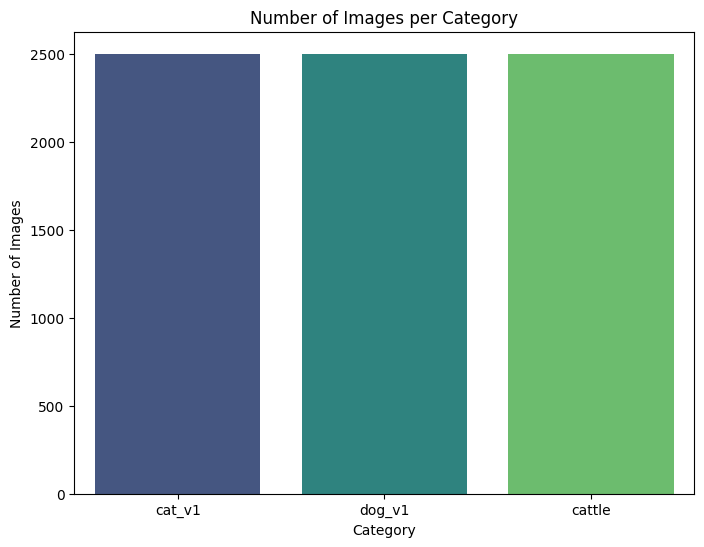

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=images_per_category.index, y=images_per_category.values, palette='viridis')
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()


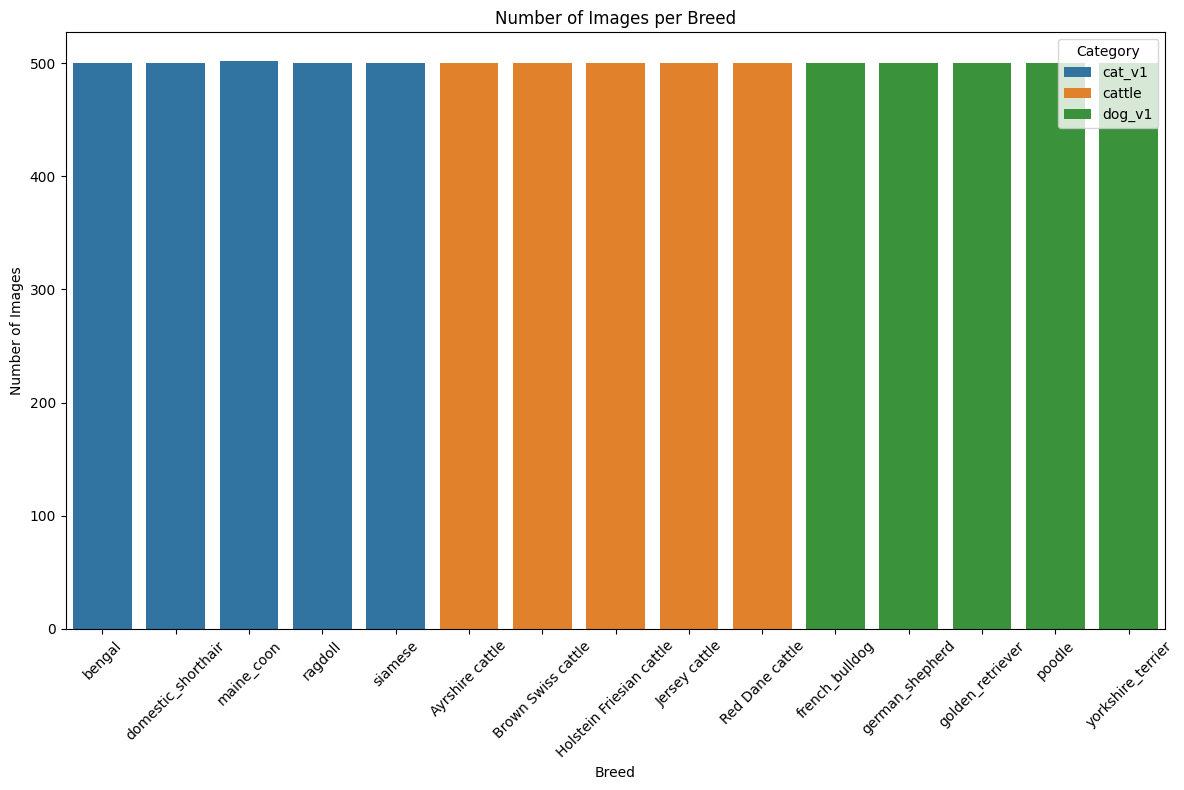

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=images_per_breed, x='Breed', y='Count', hue='Category')
plt.title('Number of Images per Breed')
plt.xlabel('Breed')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


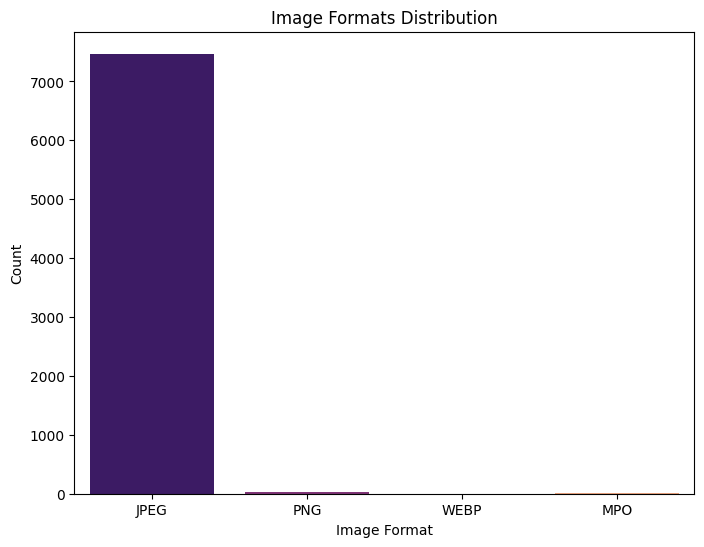

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_images, x='Image_Format', palette='magma')
plt.title('Image Formats Distribution')
plt.xlabel('Image Format')
plt.ylabel('Count')
plt.show()


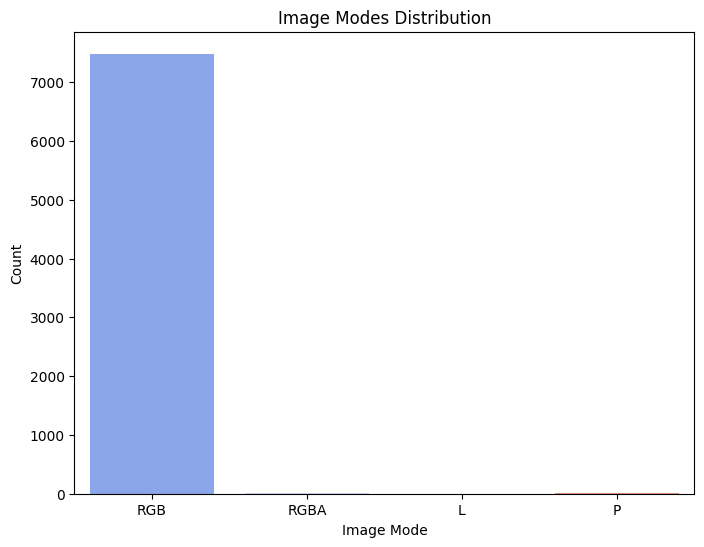

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_images, x='Image_Mode', palette='coolwarm')
plt.title('Image Modes Distribution')
plt.xlabel('Image Mode')
plt.ylabel('Count')
plt.show()


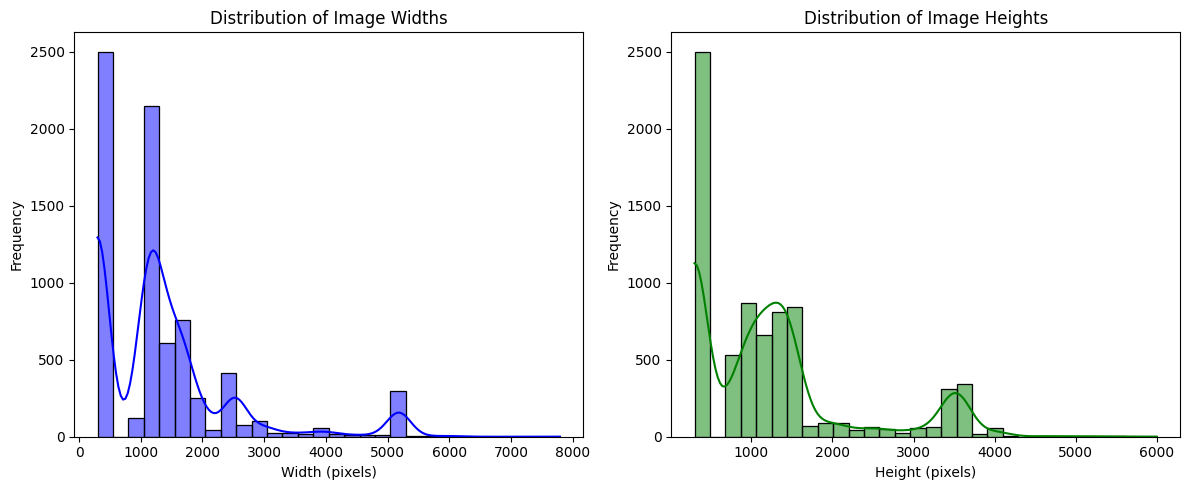

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_images['Width'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df_images['Height'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


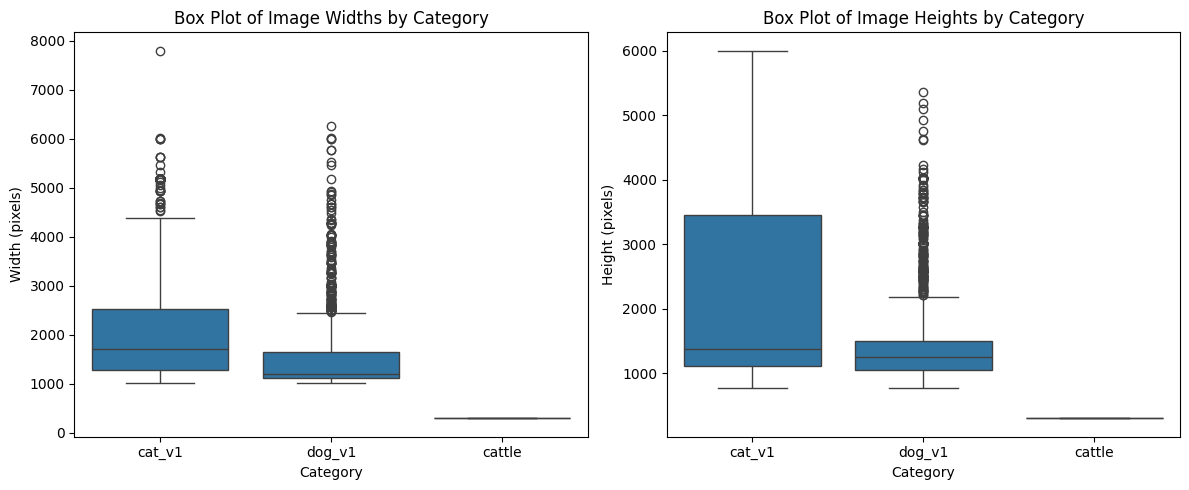

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Category', y='Width', data=df_images)
plt.title('Box Plot of Image Widths by Category')
plt.xlabel('Category')
plt.ylabel('Width (pixels)')

plt.subplot(1,2,2)
sns.boxplot(x='Category', y='Height', data=df_images)
plt.title('Box Plot of Image Heights by Category')
plt.xlabel('Category')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()


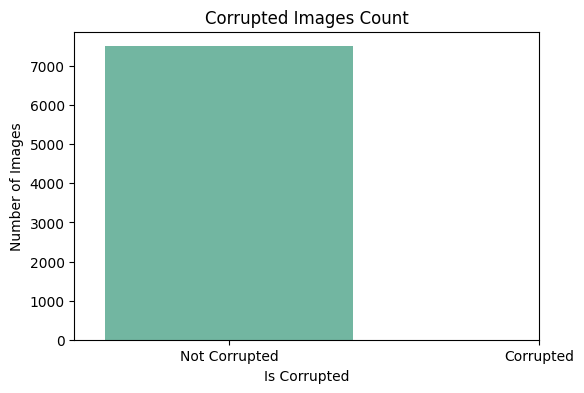

In [ ]:
corrupted_count = df_images['Is_Corrupted'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=corrupted_count.index, y=corrupted_count.values, palette='Set2')
plt.title('Corrupted Images Count')
plt.xlabel('Is Corrupted')
plt.ylabel('Number of Images')
plt.xticks([0,1], ['Not Corrupted', 'Corrupted'])
plt.show()


In [ ]:
# Filter out corrupted images
df_clean = df_images[df_images['Is_Corrupted'] == False]

# Function to remove corrupted images
def remove_corrupted_images(df, combined_dataset_path):
   corrupted = df[df['Is_Corrupted'] == True]
   for idx, row in corrupted.iterrows():
       img_path = os.path.join(combined_dataset_path, row['Category'], row['Breed'], row['Image_Name'])
       if os.path.exists(img_path):
           os.remove(img_path)
           print(f"Removed corrupted image: {img_path}")

remove_corrupted_images(df_images, combined_dataset_path)


In [ ]:
# resize the images

def resize_images(df, combined_dataset, target_size=(224, 224)):
    for idx, row in df.iterrows():
        if row['Is_Corrupted']:
            continue  # Skip corrupted images
        img_path = os.path.join(combined_dataset, row['Category'], row['Breed'], row['Image_Name'])
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img.save(img_path)
        except Exception as e:
            print(f"Error resizing image {img_path}: {e}")

resize_images(df_clean, combined_dataset)


Error resizing image /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/maine_coon/2003-4288-2848-dsc-8088-2e700.dsc-8088.htm: unknown file extension: .htm


In [ ]:
# Converting to RGB

def convert_to_rgb(df, combined_dataset):
    for idx, row in df.iterrows():
        if row['Is_Corrupted'] or row['Image_Mode'] == 'RGB':
            continue  # Skip corrupted or already RGB images
        img_path = os.path.join(combined_dataset, row['Category'], row['Breed'], row['Image_Name'])
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                img.save(img_path)
        except Exception as e:
            print(f"Error converting image {img_path} to RGB: {e}")

convert_to_rgb(df_clean, combined_dataset)


In [ ]:
# onverting to jpg

def convert_to_jpeg(df, combined_dataset):
    for idx, row in df.iterrows():
        if row['Is_Corrupted']:
            continue  # Skip corrupted images
        img_path = os.path.join(combined_dataset, row['Category'], row['Breed'], row['Image_Name'])
        file_ext = row['File_Extension']
        if file_ext != '.jpg' and file_ext != '.jpeg':
            try:
                with Image.open(img_path) as img:
                    # Define new image path with .jpg extension
                    new_img_name = os.path.splitext(row['Image_Name'])[0] + '.jpg'
                    new_img_path = os.path.join(combined_dataset, row['Category'], row['Breed'], new_img_name)
                    img = img.convert('RGB')  # Ensure it's in RGB
                    img.save(new_img_path, 'JPEG')

                    # Optionally, remove the old file
                    os.remove(img_path)
                    print(f"Converted and saved image as JPEG: {new_img_path}")
            except Exception as e:
                print(f"Error converting image {img_path} to JPEG: {e}")

convert_to_jpeg(df_clean, combined_dataset)


Converted and saved image as JPEG: /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/bengal/28209b6d36d53298996458299227dca4.jpg
Converted and saved image as JPEG: /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/bengal/Snow-Bengal-Cat.jpg
Converted and saved image as JPEG: /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/maine_coon/2003-4288-2848-dsc-8088-2e700.dsc-8088.jpg
Converted and saved image as JPEG: /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/maine_coon/d25a37ab761bdd15f4ceb95e12cf8ab8.jpg
Converted and saved image as JPEG: /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/maine_coon/image-of-a-pair-of-maine-coon-cat.jpg
Converted and saved image as JPEG: /content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/cat_v1/maine_coon/maine-coon-2.jpg
Converted and saved image as JPEG: /content/drive/My D

**Creating a pipeline for the entire preprocessing step**  didn't run yet

In [ ]:
# def clean_dataset(combined_dataset_path, animal_categories, target_size=(224,224)):
#     # Step 1: Inspect the dataset
#     df = inspect_dataset(combined_dataset_path, animal_categories)

#     # Step 2: Remove corrupted images
#     corrupted = df[df['Is_Corrupted'] == True]
#     for idx, row in corrupted.iterrows():
#         img_path = os.path.join(combined_dataset_path, row['Category'], row['Breed'], row['Image_Name'])
#         if os.path.exists(img_path):
#             os.remove(img_path)
#             print(f"Removed corrupted image: {img_path}")

#     # Update dataframe after removal
#     df = df[df['Is_Corrupted'] == False]

#     # Step 3: Convert all images to RGB
#     for idx, row in df.iterrows():
#         if row['Image_Mode'] != 'RGB':
#             img_path = os.path.join(combined_dataset_path, row['Category'], row['Breed'], row['Image_Name'])
#             try:
#                 with Image.open(img_path) as img:
#                     img = img.convert('RGB')
#                     img.save(img_path)
#                     print(f"Converted to RGB: {img_path}")
#             except Exception as e:
#                 print(f"Error converting image {img_path} to RGB: {e}")

#     # Step 4: Resize all images to target size
#     for idx, row in df.iterrows():
#         img_path = os.path.join(combined_dataset_path, row['Category'], row['Breed'], row['Image_Name'])
#         try:
#             with Image.open(img_path) as img:
#                 img = img.resize(target_size)
#                 img.save(img_path)
#                 print(f"Resized image: {img_path}")
#         except Exception as e:
#             print(f"Error resizing image {img_path}: {e}")

#     print("Dataset cleaning and standardization completed.")

# # Run the cleaning process
# clean_dataset(combined_dataset_path, animal_categories, target_size=(224,224))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for training with normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Min-Max scaling to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.15          # 15% of training data for validation
)

# Define ImageDataGenerator for testing with normalization
test_datagen = ImageDataGenerator(
    rescale=1./255,                # Min-Max scaling to [0,1]
    validation_split=0.15          # 15% of testing data for validation
)


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(
    combined_dataset,
    output_dir,
    test_size=0.15,
    random_state=42,
    animal_categories=['cat_v1', 'dog_v1', 'cattle']
):
    # """
    # Splits the dataset into training and testing sets.

    # Parameters:
    # - combined_dataset_path: Path to the combined dataset.
    # - output_dir: Path where 'train' and 'test' directories will be created.
    # - test_size: Proportion of the dataset to include in the test split.
    # - random_state: Controls the shuffling applied to the data before splitting.
    # - animal_categories: List of main categories in the dataset.
    # """

    # Define paths for train and test directories
    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')

    # Create train and test directories
    for directory in [train_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)
            print(f"Created directory: {directory}")

    # Iterate through each category and breed
    for category in animal_categories:
        category_path = os.path.join(combined_dataset, category)
        if not os.path.isdir(category_path):
            print(f"Warning: Category '{category}' does not exist in the dataset.")
            continue

        breeds = os.listdir(category_path)
        for breed in breeds:
            breed_path = os.path.join(category_path, breed)
            if not os.path.isdir(breed_path):
                print(f"Skipping non-directory file: {breed_path}")
                continue

            # List all image files in the breed directory
            image_files = [
                f for f in os.listdir(breed_path)
                if os.path.isfile(os.path.join(breed_path, f)) and
                f.lower().endswith(('.jpg', '.jpeg'))
            ]

            if not image_files:
                print(f"No images found in {breed_path}. Skipping...")
                continue

            # Split the image files into train and test
            train_files, test_files = train_test_split(
                image_files,
                test_size=test_size,
                random_state=random_state,
                shuffle=True
            )

            # Define destination paths
            train_breed_path = os.path.join(train_dir, category, breed)
            test_breed_path = os.path.join(test_dir, category, breed)

            # Create breed directories in train and test
            for path in [train_breed_path, test_breed_path]:
                os.makedirs(path, exist_ok=True)

            # Copy train images
            for img in train_files:
                src = os.path.join(breed_path, img)
                dst = os.path.join(train_breed_path, img)
                shutil.copy2(src, dst)  # copy2 preserves metadata
            print(f"Copied {len(train_files)} images to {train_breed_path}")

            # Copy test images
            for img in test_files:
                src = os.path.join(breed_path, img)
                dst = os.path.join(test_breed_path, img)
                shutil.copy2(src, dst)
            print(f"Copied {len(test_files)} images to {test_breed_path}")

    print("Dataset splitting completed successfully.")

# Usage Example
if __name__ == "__main__":
    combined_dataset = '/content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/'  # Replace with your path
    output_dir = '/content/drive/My Drive/AnimalBreedClassification/'              # Replace with your desired output path

    split_dataset(
        combined_dataset=combined_dataset,
        output_dir=output_dir,
        test_size=0.15,
        random_state=42,
        animal_categories=['cat_v1', 'dog_v1', 'cattle']
    )


Created directory: /content/drive/My Drive/AnimalBreedClassification/train
Created directory: /content/drive/My Drive/AnimalBreedClassification/test
Copied 425 images to /content/drive/My Drive/AnimalBreedClassification/train/cat_v1/bengal
Copied 75 images to /content/drive/My Drive/AnimalBreedClassification/test/cat_v1/bengal
Copied 425 images to /content/drive/My Drive/AnimalBreedClassification/train/cat_v1/domestic_shorthair
Copied 75 images to /content/drive/My Drive/AnimalBreedClassification/test/cat_v1/domestic_shorthair
Copied 426 images to /content/drive/My Drive/AnimalBreedClassification/train/cat_v1/maine_coon
Copied 76 images to /content/drive/My Drive/AnimalBreedClassification/test/cat_v1/maine_coon
Copied 425 images to /content/drive/My Drive/AnimalBreedClassification/train/cat_v1/ragdoll
Copied 75 images to /content/drive/My Drive/AnimalBreedClassification/test/cat_v1/ragdoll
Copied 425 images to /content/drive/My Drive/AnimalBreedClassification/train/cat_v1/siamese
Copie

In [ ]:
# Paths
combined_dataset_path = '/content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/'    # Replace with your path
output_split_path = '/content/drive/My Drive/AnimalBreedClassification/'          # Replace with your path

# Assuming you have already split the dataset into 'train' and 'test' directories
train_directory = os.path.join(output_split_path, 'train')
test_directory = os.path.join(output_split_path, 'test')

# Create Training Generator
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),         # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    subset='training',              # Set as training data
    shuffle=True,
    seed=42
)

# Create Validation Generator from Training Data
validation_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',            # Set as validation data
    shuffle=True,
    seed=42
)

# Create Testing Generator
test_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5431 images belonging to 15 classes.
Found 945 images belonging to 15 classes.
Found 1126 images belonging to 15 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras import regularizers

def build_alexnet(input_shape=(224, 224, 3), num_classes=15):

    model = Sequential()

    # 1. Conv Layer 1
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4),
                     activation='relu', input_shape=input_shape,
                     kernel_regularizer=regularizers.l2(0.0002)))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 2. Conv Layer 2
    model.add(Conv2D(filters=256, kernel_size=(5,5), padding='same',
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.0002)))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 3. Conv Layer 3
    model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same',
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.0002)))

    # 4. Conv Layer 4
    model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same',
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.0002)))

    # 5. Conv Layer 5
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same',
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.0002)))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 6. Flatten
    model.add(Flatten())

    # 7. Fully Connected Layer 1
    model.add(Dense(4096, activation='relu',
                    kernel_regularizer=regularizers.l2(0.0005)))
    model.add(Dropout(0.5))

    # 8. Fully Connected Layer 2
    model.add(Dense(4096, activation='relu',
                    kernel_regularizer=regularizers.l2(0.0005)))
    model.add(Dropout(0.5))

    # 9. Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Example Usage:
# Assuming you have 3 categories (cat, dog, cattle)
num_classes = 15
alexnet_model = build_alexnet(input_shape=(224, 224, 3), num_classes=num_classes)
alexnet_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │          61,455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,810,895 (178.57 MB)

 Trainable params: 46,809,679 (178.56 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
alexnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the training and testing directories
train_directory = '/content/drive/My Drive/AnimalBreedClassification/train'  # Replace with your path
test_directory = '/content/drive/My Drive/AnimalBreedClassification/test'    # Replace with your path

# Define ImageDataGenerator for training with augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define ImageDataGenerator for validation/testing with only normalization
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Create Training Generator
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),         # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Create Validation Generator
validation_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 6376 images belonging to 15 classes.
Found 1126 images belonging to 15 classes.


In [ ]:

# Train the model
history = alexnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
)
